In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from __future__ import division
%matplotlib inline

In [148]:
#G=nx.read_edgelist('bio-celegans.txt', nodetype=int)
N = 10000
p = 0.05
G = nx.erdos_renyi_graph(N, p)

## Model 3

Выбираем случайно вершину i и активируем ее. Далее, итерационно делаем следующее: 
1. Берем ВСЕХ неактивных соседей этой вершины и с вероятностью p (параметр модели) заражаем каждую из них. 
2. Вершины, зараженные на прердыдущем шаге становятся здоровыми с вероятностью 1 - p
3. Из зараженных случайно выбираем одну и повторяем шаги 1, 2

In [86]:
def model3(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    
    infected_fraction = []
    susc_fraction = []
    
    inf_dict = defaultdict(list)
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
        
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)        
        
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            for elem in inf_dict[i-1]:
                p = random.uniform(0, 1)
                if p > thresholdSusc:
                    inf.remove(elem)
            cur_infected_node = random.choice(inf_dict[i])
            
        infected_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
        
    
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
    print('Suscepted probability: ', thresholdSusc)
    
    return inf, susc, infected_fraction, susc_fraction

In [94]:
prob_model2 = np.arange(0.01, 0.99, 0.1)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_model2 = []

infectedP, susceptedP = [], []

for p in prob_model2:
    inf, susc, inf_arr_fraction, susc_arr_fraction = [], [], [], []
    inf, susc, inf_arr_fraction, susc_arr_fraction = model3(G, 5000, p, 0.5, startNode)
    inf_arr_model2.append(len(inf) / nx.number_of_nodes(G))
    infectedP.append(inf_arr_fraction)
    susceptedP.append(susc_arr_fraction)

-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 1996)
('Number of steps: ', 5000)
('Infected probability: ', 0.01)
('Suscepted probability: ', 0.5)
-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 1996)
('Number of steps: ', 5000)
('Infected probability: ', 0.11)
('Suscepted probability: ', 0.5)
-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 1996)
('Number of steps: ', 5000)
('Infected probability: ', 0.21000000000000002)
('Suscepted probability: ', 0.5)
-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 1996)
('Number of steps: ', 5000)
('Infected probability: ', 0.31000000000000005)
('Suscepted probability: ', 0.5)
-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 1996)
('Number of st

In [95]:
inf_arr_model2

[0.7994, 0.9782, 0.99, 0.9908, 0.9774, 0.9886, 0.974, 0.9892, 0.9744, 0.9764]

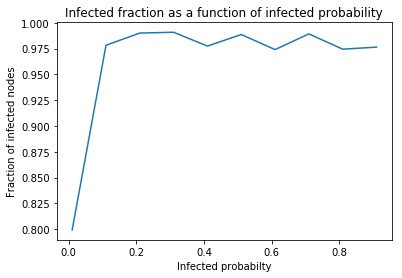

In [96]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob_model2, inf_arr_model2)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

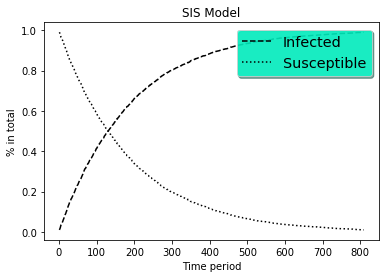

In [138]:
steps = np.arange(1, len(infectedP[2]) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, infectedP[2], 'k--', label='Infected')
ax.plot(steps, susceptedP[2], 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SIS Model')

plt.show()

In [151]:
startNode = random.randint(1, nx.number_of_nodes(G))
inf, susc, inf_arr_fraction, susc_arr_fraction = [], [], [], []
inf, susc, inf_arr_fraction, susc_arr_fraction = model3(G, 10000, 0.5, 0.1, startNode)
steps = np.arange(1, len(inf_arr_fraction) + 1, 1)

-----------------------------------
SIS model
-----------------------------------
('Initial infected node: ', 7333)
('Number of steps: ', 10000)
('Infected probability: ', 0.5)
('Suscepted probability: ', 0.1)


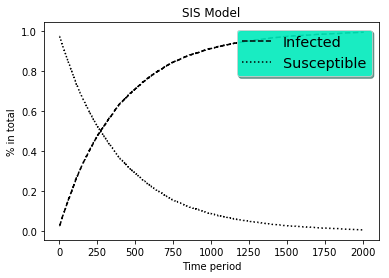

In [152]:
fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SIS Model')

plt.show()